In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
from numpy.random import seed

seed(42)
import tensorflow as tf

tf.random.set_seed(46)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
mpl.rcParams["lines.linewidth"] = 3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.core.display import HTML

HTML(open("custom.html", "r").read())

# Chapter 8b: Introduction to Tensorflow

## Introduction to TensorFlow (keras API)

### A bit about Keras?

* It is a high level API to create and work with neural networks
* Used to support multiple backends such as **TensorFlow** from Google, **Theano** (Theano is dead now) and **CNTK** (Microsoft Cognitive Toolkit), up till release 2.3.0 
* Very good for creating neural nets quickly and hides away a lot of tedious work
* Has been incorporated into official TensorFlow (which obviously only works with tensorflow) and is its main API as of version 2.0

<center>
<figure>
<img src="./images/neuralnets/neural_net_keras_1.svg" width="700"/>
<figcaption>Building this model in TensorFlow (Keras)</figcaption>
</figure>
</center>

In [2]:
# Say hello to Tensorflow
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential

# Creating a model
model = Sequential()

# Adding layers to this model
# 1st Hidden layer
# A Dense/fully-connected layer which takes as input a
# feature array of shape (samples, num_features)
# Here input_shape = (2,) means that the layer expects an input with num_features = 2
# and the sample size could be anything
# The activation function for this layer is set to "relu"
model.add(Dense(units=4, input_shape=(2,), activation="relu"))

# 2nd Hidden layer
# This is also a fully-connected layer and we do not need to specify the
# shape of the input anymore (We need to do that only for the first layer)
# NOTE: Now we didn't add the activation seperately. Instead we just added it
# while calling Dense(). This and the way used for the first layer are Equivalent!
model.add(Dense(units=4, activation="relu"))


# The output layer
model.add(Dense(units=1))
model.add(Activation("sigmoid"))

model.summary()

2024-03-14 13:45:29.967387: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-14 13:45:29.967405: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-14 13:45:29.967410: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-14 13:45:29.967441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 13:45:29.967457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### XOR using neural networks

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

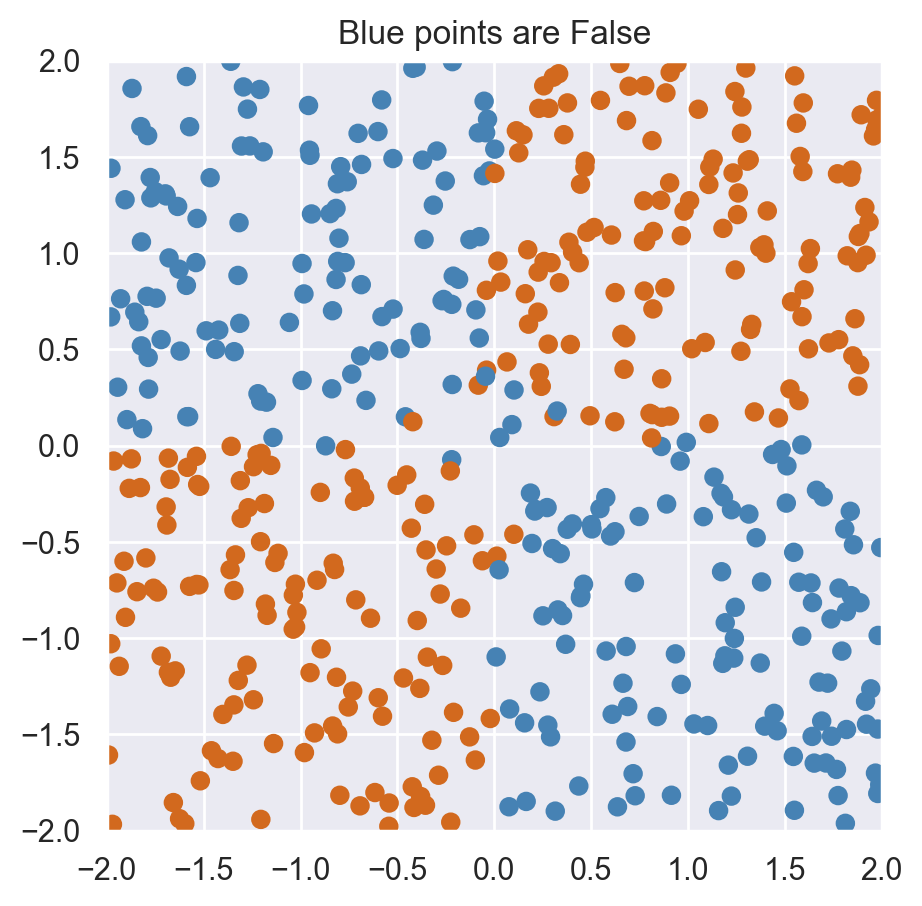

In [4]:
# Creating a network to solve the XOR problem

# Loading and plotting the data
xor = pd.read_csv("data/xor.csv")

# Using x and y coordinates as featues
features = xor.iloc[:, :-1]
# Convert boolean to integer values (True->1 and False->0)
labels = 1 - xor.iloc[:, -1].astype(int)

colors = [["steelblue", "chocolate"][i] for i in labels]
plt.figure(figsize=(5, 5))
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("Blue points are False")
plt.scatter(features["x"], features["y"], color=colors, marker="o");

In [5]:
# Building a simple Tensorflow model


def a_simple_NN():

    model = Sequential()

    model.add(Dense(4, input_shape=(2,), activation="relu"))

    model.add(Dense(4, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

    return model

In [6]:
# Instantiating the model
model = a_simple_NN()

# Splitting the dataset into training (70%) and validation sets (30%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

# Setting the number of passes through the entire training set
num_epochs = 300

# model.fit() is used to train the model
# We can pass validation data while training
model_run = model.fit(
    X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test)
)

Epoch 1/300


2024-03-14 13:45:30.756573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 44ms/step - loss: 1.0885 - accuracy: 0.4971 - val_loss: 1.0223 - val_accuracy: 0.5067
Epoch 2/300
11/11 [==============================] - 0s 9ms/step - loss: 1.0547 - accuracy: 0.5000 - val_loss: 0.9950 - val_accuracy: 0.5200
Epoch 3/300
 1/11 [=>............................] - ETA: 0s - loss: 1.1666 - accuracy: 0.5312

2024-03-14 13:45:32.362271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 8ms/step - loss: 1.0272 - accuracy: 0.5029 - val_loss: 0.9722 - val_accuracy: 0.5200
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 1.0041 - accuracy: 0.5086 - val_loss: 0.9510 - val_accuracy: 0.5200
Epoch 5/300
11/11 [==============================] - 0s 8ms/step - loss: 0.9849 - accuracy: 0.5057 - val_loss: 0.9320 - val_accuracy: 0.5333
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 0.9661 - accuracy: 0.5086 - val_loss: 0.9143 - val_accuracy: 0.5333
Epoch 7/300
11/11 [==============================] - 0s 8ms/step - loss: 0.9468 - accuracy: 0.5143 - val_loss: 0.8977 - val_accuracy: 0.5333
Epoch 8/300
11/11 [==============================] - 0s 8ms/step - loss: 0.9300 - accuracy: 0.5143 - val_loss: 0.8828 - val_accuracy: 0.5400
Epoch 9/300
11/11 [==============================] - 0s 8ms/step - loss: 0.9140 - accuracy: 0.5114 - val_loss: 0.8697 - val_accuracy: 0.5400
Epoch 10/300
11/11 [=====

<div class="alert alert-block alert-info"><p><i class="fa fa-info-circle"></i>&nbsp;
    NOTE: We can pass "verbose=0" to model.fit() to suppress the printing of model output on the terminal/notebook.
</p></div>

The history has the following data:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


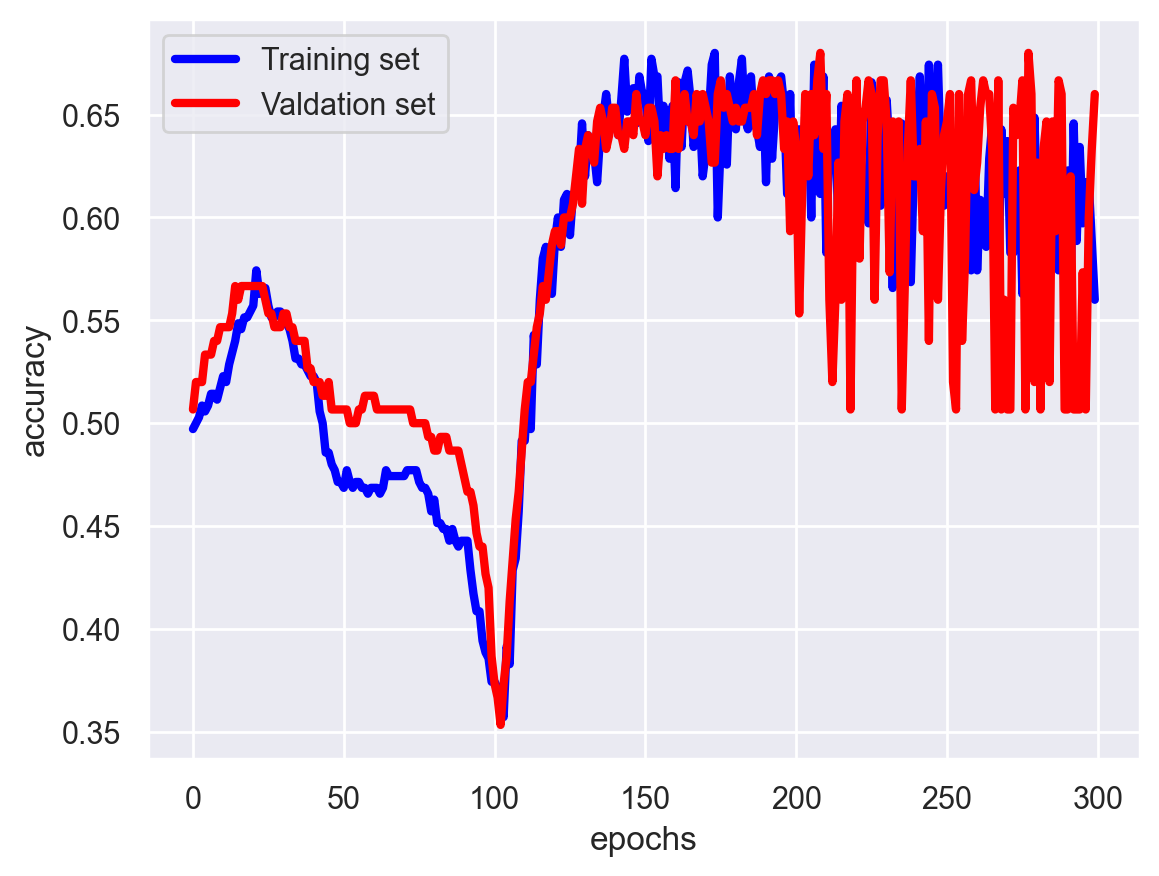

In [7]:
# Plotting the loss and accuracy on the training and validation sets during the training
# This can be done by using TensorFlow (Keras) callback "history" which is applied by default
history_model = model_run.history

print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(
    x=model_run.epoch, y=history_model["accuracy"], color="blue", label="Training set"
)
sns.lineplot(
    x=model_run.epoch, y=history_model["val_accuracy"], color="red", label="Valdation set"
)
plt.xlabel("epochs")
plt.ylabel("accuracy");

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
The plots such as above are essential for analyzing the behaviour and performance of the network and to tune it in the right direction. However, for the example above we don't expect to derive a lot of insight from this plot as the function we are trying to fit is quite simple and there is not too much noise. We will see the significance of these curves in a later example.
</p>
</div>

In [8]:
# Before we move on forward we see how to save and load a TensorFlow (keras) model
model.save("./data/my_first_NN.h5")
model.save("./data/my_first_NN")


# Optional: See what is in the hdf5 file we just created above

from tensorflow.keras.models import load_model

model = load_model("./data/my_first_NN.h5")
model_pb = load_model("./data/my_first_NN")

INFO:tensorflow:Assets written to: ./data/my_first_NN/assets


INFO:tensorflow:Assets written to: ./data/my_first_NN/assets


For the training and validation in the example above we split our dataset into a 70-30 train-validation set. We know from previous chapters that to more robustly estimate the accuracy of our model we can use **K-fold cross-validation**.
This is even more important when we have small datasets and cannot afford to reserve a validation set!

One way to do the cross-validation here would be to write our own function to do this. However, we also know that **scikit-learn** provides several handy functions to evaluate and tune the models. So the question is:


<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
    Can we somehow use the scikit-learn functions or the ones we wrote ourselves for scikit-learn models to evaluate and tune our TensorFlow (Keras) models?


The Answer is **YES !**
</p>
</div>



We show how to do this in the following section.

## Using scikit-learn functions on TensorFlow (Keras) models


<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
TensorFlow (Keras) offers 2 wrappers which allow its Sequential models to be used with scikit-learn. 

There are: **KerasClassifier** and **KerasRegressor**.

For more information:
https://keras.io/scikit-learn-api/
</p>
</div>



**Now lets see how this works!**

In [9]:
# We wrap the TensorFlow (Keras) model we created above with KerasClassifier
from sklearn.model_selection import cross_val_score
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Wrapping TensorFlow (Keras) model
# NOTE: We pass verbose=0 to suppress the model output
num_epochs = 400
model_scikit = KerasClassifier(model=a_simple_NN, epochs=num_epochs, verbose=0)

In [10]:
# Let's reuse the function to visualize the decision boundary which we saw in chapter 2 with minimal change


#def list_flatten(list_of_list):
#    flattened_list = [i for j in list_of_list for i in j]
#    return flattened_list

def list_flatten(list_of_list):
  for item in list_of_list:
    if isinstance(item, list):
      for subitem in item: yield subitem
    else:
      yield item


def plot_points(plt=plt, marker="o"):
    colors = [["steelblue", "chocolate"][i] for i in labels]
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], color=colors, marker=marker)


def train_and_plot_decision_surface(
    name, classifier, features_2d, labels, preproc=None, plt=plt, marker="o", N=400
):

    features_2d = np.array(features_2d)
    xmin, ymin = features_2d.min(axis=0)
    xmax, ymax = features_2d.max(axis=0)

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)

    if preproc is not None:
        points_for_classifier = preproc.fit_transform(points)
        features_2d = preproc.fit_transform(features_2d)
    else:
        points_for_classifier = points

    classifier.fit(features_2d, labels, verbose=0)

    if name == "Neural Net":
        # predicted = classifier.predict(features_2d)
        # predicted = list_flatten(predicted)
        predicted = list(list_flatten(
            (classifier.predict(features_2d) > 0.5).astype("int32")
        ))
    # else:
    # predicted = classifier.predict(features_2d)

    if preproc is not None:
        name += " (w/ preprocessing)"
    print(name + ":\t", sum(predicted == labels), "/", len(labels), "correct")

    if name == "Neural Net":
        # classes = np.array(list_flatten(classifier.predict(points_for_classifier)), dtype=bool)
        classes = np.array(
            list(list_flatten(
                (classifier.predict(points_for_classifier) > 0.5).astype("int32")
            )),
            dtype=bool,
        )
    # else:
    # classes = np.array(classifier.predict(points_for_classifier), dtype=bool)
    plt.plot(
        points[~classes][:, 0],
        points[~classes][:, 1],
        "o",
        color="steelblue",
        markersize=1,
        alpha=0.01,
    )
    plt.plot(
        points[classes][:, 0],
        points[classes][:, 1],
        "o",
        color="chocolate",
        markersize=1,
        alpha=0.04,
    )

In [11]:
_, ax = plt.subplots(figsize=(6, 6))

train_and_plot_decision_surface("Neural Net", model_scikit, features, labels, plt=ax)
plot_points(plt=ax)

2024-03-14 13:45:59.543586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


AttributeError: 'str' object has no attribute '__name__'

In [ ]:
# Applying K-fold cross-validation
# Here we pass the whole dataset, i.e. features and labels, instead of splitting it.
num_folds = 5
cross_validation = cross_val_score(
    model_scikit, features, labels, cv=num_folds, verbose=0
)

print("The acuracy on the ", num_folds, " validation folds:", cross_validation)
print(
    "The Average acuracy on the ",
    num_folds,
    " validation folds:",
    np.mean(cross_validation),
)

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
The code above took quite long to finish even though we used only 5  CV folds and the neural network and data size are very small! This gives an indication of the enormous compute requirements of training production-grade deep neural networks.
</p>
</div>

## Hyperparameter optimization

We know from chapter 6 that there are 2 types of parameters which need to be tuned for a machine learning model.
* Internal model parameters (weights) which can be learned for e.g. by gradient-descent
* Hyperparameters

In the model created above we made some arbitrary choices such as the choice of the optimizer we used, optimizer's learning rate, number of hidden units and so on ...

Now that we have the TensorFlow (keras) model wrapped as a scikit-learn model we can use the grid search functions we have seen in chapter 6.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Just to remember
model_scikit = KerasClassifier(
    model=a_simple_NN, **{"epochs": num_epochs, "verbose": 0}
)

In [ ]:
HP_grid = {"epochs": [30, 50, 100]}
search = GridSearchCV(estimator=model_scikit, param_grid=HP_grid)
search.fit(features, labels)
print(search.best_score_, search.best_params_)

In [ ]:
HP_grid = {"epochs": [10, 15, 30], "batch_size": [10, 20, 30]}
search = GridSearchCV(estimator=model_scikit, param_grid=HP_grid)
search.fit(features, labels)
print(search.best_score_, search.best_params_)

In [ ]:
# A more general model for further Hyperparameter optimization
from tensorflow.keras import optimizers


def a_simple_NN(activation="relu", num_hidden_neurons=[4, 4], learning_rate=0.01):

    model = Sequential()

    model.add(Dense(num_hidden_neurons[0], input_shape=(2,), activation=activation))

    model.add(Dense(num_hidden_neurons[1], activation=activation))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizers.RMSprop(learning_rate=learning_rate),
        metrics=["accuracy"],
    )

    return model

### keras-tuner

In [ ]:
def a_simple_NN(activation="relu", num_hidden_neurons=[4, 4], learning_rate=0.01):

    model = Sequential()

    model.add(Dense(num_hidden_neurons[0], input_shape=(2,), activation=activation))

    model.add(Dense(num_hidden_neurons[1], activation=activation))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizers.RMSprop(learning_rate=learning_rate),
        metrics=["accuracy"],
    )
    return model

In [ ]:
import keras_tuner as kt


def model_builder(hp):

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int("units", min_value=4, max_value=8, step=2)
    hp_units_2 = hp.Int("units2", min_value=4, max_value=16, step=2)

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    # Tune the choice of the activation function
    activation = hp.Choice(name="activation", values=["relu", "sigmoid"])

    model = a_simple_NN(activation, [hp_units, hp_units_2], hp_learning_rate)

    return model


# The argument ‘hp’ is an instance of the class HyperParameters.

In [ ]:
tuner = kt.BayesianOptimization(
    model_builder,
    objective="val_accuracy",
    max_trials=10,
    project_name="intro_to_kt",
    overwrite=True,
)

In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]
print(tuner.get_best_hyperparameters()[0].values)

## Exercise section:  
1. Create a neural network to classify the 2d points example from chapter 2 (Optional: As you create the model read a bit on the different TensorFlow (keras) commands we have used)
2. Plot the decision boundary
3. Choose and optimize a couple of hyperparameters
4. **OPTIONAL:** What function from scikit-learn other than GridSearchCV can we use for hyperparameter optimization? Use it (or use the equivalent method from keras-tuner)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
import keras_tuner as kt

In [ ]:
circle = pd.read_csv("data/circle.csv")
# Using x and y coordinates as featues
features = circle.iloc[:, :-1]
# Convert boolean to integer values (True->1 and False->0)
labels = circle.iloc[:, -1].astype(int)

colors = [["steelblue", "chocolate"][i] for i in circle["label"]]
plt.figure(figsize=(5, 5))
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.scatter(features["x"], features["y"], color=colors, marker="o");

In [ ]:
# Insert Code here

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Another library which you should definitely look at for doing hyperparameter optimization with keras models is the <a href="https://github.com/maxpumperla/hyperas">Hyperas library</a> which is a wrapper around the <a href="https://github.com/hyperopt/hyperopt">Hyperopt library</a>. 

</p>
</div>

The examples we saw above are really nice to show various features of the TensorFlow (Keras) library and to understand how we build and train a model. However, they are not the ideal problems one should solve using neural networks. They are too simple and can be solved easily by classical machine learning algorithms. 

Now we show examples where Neural Networks really shine over classical machine learning algorithms.

## Handwritten Digits Classification (multi-class classification)
**MNIST Dataset**

MNIST datasets is a very common dataset used in machine learning. It is widely used to train and validate models.


> The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a > test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
> It is a good database for people who want to try learning techniques and pattern recognition methods on real-world 
> data while spending minimal efforts on preprocessing and formatting.
> source: http://yann.lecun.com/exdb/mnist/

This dataset consists of images of handwritten digits between 0-9 and their corresponsing labels. We want to train a neural network which is able to predict the correct digit on the image. 
This is a multi-class classification problem. Unlike binary classification which we have seen till now we will classify data into 10 different classes.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Loading the dataset in TensorFlow (keras)
# Later you can explore and play with other datasets with come with TensorFlow (Keras)
from tensorflow.keras.datasets import mnist

# Loading the train and test data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Looking at the dataset
print(X_train.shape)

In [ ]:
# We can see that the training set consists of 60,000 images of size 28x28 pixels
i = np.random.randint(0, X_train.shape[0])
sns.set_style("white")
plt.imshow(X_train[i], cmap="gray_r")
sns.set(style="darkgrid")
print("This digit is: ", y_train[i])

In [ ]:
# Look at the data values for a couple of images
print(X_train[0].min(), X_train[1].max())

The data consists of values between 0-255 representing the **grayscale level**

In [ ]:
# The labels are the digit on the image
print(y_train.shape)

In [ ]:
# Scaling the data
# It is important to normalize the input data to (0-1) before providing it to a neural net
# We could use the previously introduced function from scikit-learn. However, here it is sufficient to
# just divide the input data by 255
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Also we need to reshape the input data such that each sample is a vector and not a 2D matrix
X_train_prep = X_train_norm.reshape(X_train_norm.shape[0], 28 * 28)
X_test_prep = X_test_norm.reshape(X_test_norm.shape[0], 28 * 28)

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
One-Hot encoding

In multi-class classification problems the labels are provided to the neural network as something called **One-hot encodings**. The categorical labels (0-9 here) are converted to vectors.

For the MNIST problem where the data has **10 categories** we will convert every label to a vector of length 10. 
All the entries of this vector will be zero **except** for the index which is equal to the (integer) value of the label.

For example:
if label is 4. The one-hot vector will look like **[0 0 0 0 1 0 0 0 0 0]**

Fortunately, TensorFlow (Keras) has a built-in function to achieve this and we do not have to write a code for this ourselves.
</p>
</div>

In [ ]:
from tensorflow.keras import utils

y_train_onehot = utils.to_categorical(y_train, num_classes=10)
y_test_onehot = utils.to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)

In [ ]:
# Building the tensorflow model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def mnist_model():
    model = Sequential()

    model.add(Dense(64, input_shape=(28 * 28,), activation="relu"))

    model.add(Dense(64, activation="relu"))

    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    )
    return model


model = mnist_model()

model_run = model.fit(X_train_prep, y_train_onehot, epochs=20, batch_size=512)

In [ ]:
print(
    "The [loss, accuracy] on test dataset are: ",
    model.evaluate(X_test_prep, y_test_onehot),
)

## Exercise section
* Reinitialize and run the model again with validation dataset, plot the accuracy as a function of epochs, play with number of epochs and observe what is happening.

In [ ]:
# Code here

What we see here is **overfitting**. Within the first few epochs the training and validation datasets show similar accuracies but thereafter the network starts to overfit to the training set.

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Keep in mind that neural networks are quite prone to overfitting so always check for it.
</p>
</div>

### Adding regularization

In [ ]:
# Adding l2 regularization
# Building the TensorFlow (keras) model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2


def mnist_model():

    model = Sequential()

    model.add(
        Dense(
            64, input_shape=(28 * 28,), activation="relu", kernel_regularizer=l2(0.01)
        )
    )

    model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))

    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    )
    return model


model = mnist_model()

num_epochs = 20
model_run = model.fit(
    X_train_prep,
    y_train_onehot,
    epochs=num_epochs,
    batch_size=512,
    validation_data=(X_test_prep, y_test_onehot),
)

In [ ]:
# Evaluating the model on test dataset
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(x=model_run.epoch, y=history_model["accuracy"], color="blue", label="Training set")
sns.lineplot(
    x=model_run.epoch, y=history_model["val_accuracy"], color="red", label="Valdation set"
)
plt.xlabel("epochs")
plt.ylabel("accuracy");

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Another way to add regularization and to make the network more robust is by applying Dropout. When we add dropout to a layer a specified percentage of units in that layer are switched off. 
    
Both L2 regularization and Dropout make the model simpler and thus reducing overfitting.
</p>
</div>

### Exercise section
* Add dropout instead of L2 regularization in the network above

In [ ]:
# Adding dropout is easy in TensorFlow (keras)
# We import a layer called Dropout and add as follows
# model.add(Dropout(0.2)) to randomly drop 20% of the hidden units

## Callbacks

Tensorflow offers many useful callbacks which are often used.
Examples:
* ModelCheckpoint - Used to save checkpoints of the model at specified frequency
* TensorBoard - Super useful for monitoring and visualizations
* ReduceLROnPlateau - Reduces the learning rate when the monitored metric has stopped improving

For a complete list have a look at: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

In [ ]:
%load_ext tensorboard

In [ ]:
# Example showing the use of tensorboard
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from pathlib import Path

def mnist_model():

    model = Sequential()

    model.add(Dense(64, input_shape=(28 * 28,), activation="relu"))

    model.add(Dropout(0.15))

    model.add(Dense(64, activation="relu"))

    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    )

    return model


model = mnist_model()

num_epochs = 20
log_dir = ('/').join([str(Path.home()),'tensorboard_logs'])
tensorboard_callback = TensorBoard(log_dir=log_dir)
model_run = model.fit(
    X_train_prep,
    y_train_onehot,
    epochs=num_epochs,
    batch_size=512,
    validation_data=(X_test_prep, y_test_onehot),
    callbacks=[tensorboard_callback],
)

<div class="alert alert-block alert-info"><p><i class="fa fa-info-circle"></i>&nbsp;
    <a href=https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams>HParams Dashboard</a>: The HParams dashboard in TensorBoard provides several tools to help with this process of identifying the best experiment or most promising sets of hyperparameters.
</p></div>